In [1]:
# Import Dependencies 

import pandas as pd
import numpy as numpy

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine 

from flask import Flask, jsonify, render_template
from flask_sqlalchemy import SQLAlchemy

import requests 
import json
from config import api_key
from config import google_api_key

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from stats import median

In [2]:
POSTGRES = {
'user': 'postgres',
'pw': api_key,
'db': 'suicide_rates_overview_db',
'host': 'localhost',
'port': '5432',
}

engine = create_engine('postgresql://%(user)s:%(pw)s@%(host)s:%(port)s/%(db)s'% POSTGRES)
df_suicide_rates_df = pd.read_sql('select * from suicide_rates_db', con=engine)
df_suicide_rates_df

,id,country,year,sex,age,suicides_no,population,suicideshundredk,country_year,hdiforyear,gdp_for_year,gdp_per_capita,generation
0,1,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,2,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,3,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,4,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,5,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers
5,6,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,2156624900,796,G.I. Generation
6,7,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,2156624900,796,Silent
7,8,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,2156624900,796,Boomers
8,9,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,2156624900,796,G.I. Generation
9,10,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,2156624900,796,Generation X


In [3]:
df_suicide_rates_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 13 columns):
id                  27820 non-null int64
country             27820 non-null object
year                27820 non-null int64
sex                 27820 non-null object
age                 27820 non-null object
suicides_no         27820 non-null int64
population          27820 non-null int64
suicideshundredk    27820 non-null float64
country_year        27820 non-null object
hdiforyear          8364 non-null float64
gdp_for_year        27820 non-null int64
gdp_per_capita      27820 non-null int64
generation          27820 non-null object
dtypes: float64(2), int64(6), object(5)
memory usage: 2.8+ MB


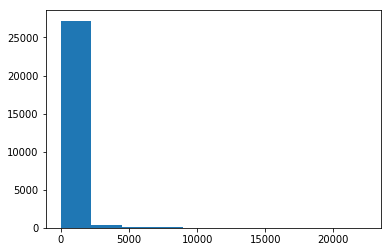

In [4]:
plt.hist(df_suicide_rates_df.suicides_no)
plt.show()

In [5]:
df_suicide_rates_df.describe(percentiles=[0.5, 0.7, 0.8, 0.9, .95, .99])

,id,year,suicides_no,population,suicideshundredk,hdiforyear,gdp_for_year,gdp_per_capita
count,27820.000000,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,2.782000e+04,27820.000000
mean,13910.500000,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,4.455810e+11,16866.464414
std,8031.086581,8.469055,902.047917,3.911779e+06,18.961511,0.093367,1.453610e+12,18887.576472
min,1.000000,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,4.691962e+07,251.000000
50%,13910.500000,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,4.811469e+10,9372.000000
70%,19474.300000,2007.000000,94.300000,1.155719e+06,13.563000,0.837000,1.938704e+11,21219.000000
80%,22256.200000,2010.000000,190.000000,2.367638e+06,20.530000,0.872000,3.647565e+11,28733.000000
90%,25038.100000,2013.000000,496.000000,4.960714e+06,33.291000,0.897000,1.002219e+12,43487.000000
95%,26429.050000,2014.000000,1050.050000,8.850240e+06,50.530500,0.912000,2.123131e+12,54294.000000
99%,27541.810000,2015.000000,3993.670000,1.999273e+07,91.571000,0.932370,6.539299e+12,89634.000000


In [6]:
suicide_df = df_suicide_rates_df[df_suicide_rates_df["suicides_no"]<=4000]

In [7]:
suicide_df.describe(percentiles=[0.5, 0.7, 0.8, 0.9, .95, .99, .995])

,id,year,suicides_no,population,suicideshundredk,hdiforyear,gdp_for_year,gdp_per_capita
count,27542.000000,27542.000000,27542.00000,2.754200e+04,27542.000000,8310.000000,2.754200e+04,27542.000000
mean,13828.137608,2001.262508,170.80586,1.676021e+06,12.483133,0.775965,3.976389e+11,16783.200385
std,8013.522671,8.469014,420.39159,3.437168e+06,18.607669,0.093247,1.280698e+12,18873.982475
min,1.000000,1985.000000,0.00000,2.780000e+02,0.000000,0.483000,4.691962e+07,251.000000
50%,13827.500000,2002.000000,24.00000,4.198125e+05,5.870000,0.778000,4.671202e+10,9283.000000
70%,19335.700000,2007.000000,91.00000,1.101681e+06,13.207000,0.837000,1.868299e+11,21027.000000
80%,22192.800000,2010.000000,179.00000,2.207180e+06,19.930000,0.870000,3.435844e+11,28588.000000
90%,24946.900000,2013.000000,454.90000,4.569454e+06,32.319000,0.897000,8.937573e+11,43419.000000
95%,26335.950000,2014.000000,901.95000,7.809455e+06,48.488500,0.911000,1.842628e+12,54294.000000
99%,27544.590000,2015.000000,2441.54000,1.791201e+07,90.494900,0.932910,5.252629e+12,90139.040000


In [8]:
suicide_df = suicide_df[suicide_df["gdp_for_year"]<=5.252629e+12]

In [9]:
suicide_df.describe(percentiles=[0.5, 0.7, 0.8, 0.9, .95, .99, .995])

,id,year,suicides_no,population,suicideshundredk,hdiforyear,gdp_for_year,gdp_per_capita
count,27269.000000,27269.000000,27269.000000,2.726900e+04,27269.000000,8192.000000,2.726900e+04,27269.000000
mean,13715.354762,2001.247130,158.568081,1.508056e+06,12.502119,0.774331,2.956740e+11,16520.302945
std,7959.296873,8.475014,386.830517,2.860632e+06,18.653178,0.092871,6.717230e+11,18756.143731
min,1.000000,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,4.691962e+07,251.000000
50%,13731.000000,2002.000000,23.000000,4.103170e+05,5.870000,0.777000,4.551903e+10,9046.000000
70%,19184.600000,2007.000000,88.000000,1.054134e+06,13.226000,0.833000,1.786352e+11,20411.000000
80%,22014.400000,2010.000000,171.000000,2.033582e+06,19.974000,0.867000,3.194234e+11,28068.000000
90%,24741.200000,2013.000000,417.000000,4.306324e+06,32.290000,0.895000,7.731306e+11,42781.000000
95%,26104.600000,2014.000000,825.000000,6.975440e+06,48.572000,0.910000,1.552484e+12,53923.000000
99%,27547.320000,2015.000000,2187.640000,1.570119e+07,90.632000,0.933000,3.752366e+12,90490.000000


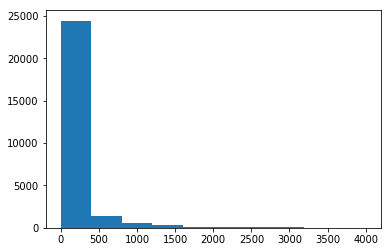

In [10]:
plt.hist(suicide_df.suicides_no)
plt.show()

In [11]:
#Assign the data to X and y

X = suicide_df[["population", "gdp_for_year", "gdp_per_capita"]]
y = suicide_df["suicides_no"].values.reshape(-1, 1)
print(X.shape, y.shape)

(27269, 3) (27269, 1)


In [12]:
# Use train_test_split to create training and testing data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
#Create the model using linear regression 

from sklearn.linear_model import LinearRegression 
model = LinearRegression()

In [14]:
#Fit the model to the training data and calculate the scores for the training date 
#Create the model using linear regression 

from sklearn.linear_model import LinearRegression 
model = LinearRegression()the
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score:  {training_score}")
print(f"Testing Score: {testing_score}")

Training Score:  0.40221631577694633
Testing Score: 0.40258787865093026


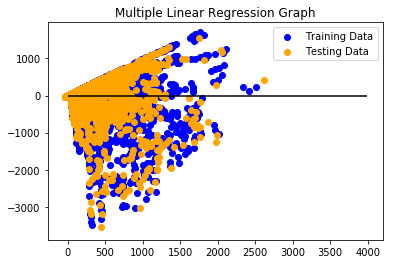

In [20]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Multiple Linear Regression Graph")
plt.savefig('multiplelinearregression.png')
### END SOLUTION

In [16]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [21]
Predicted output: [54.77328779]
Prediction Error: [33.77328779]


In [17]:
preds = pd.DataFrame()
preds["Predicted"] = list(map(lambda x: x[0], (predictions)))
preds["Actual"] = y
preds["Error"] = list(map(lambda x: x[0], (predictions - y)))

preds.head(5)

,Predicted,Actual,Error
0,54.773288,21,33.773288
1,54.462124,16,38.462124
2,53.300022,14,39.300022
3,36.287613,1,35.287613
4,52.322078,9,43.322078


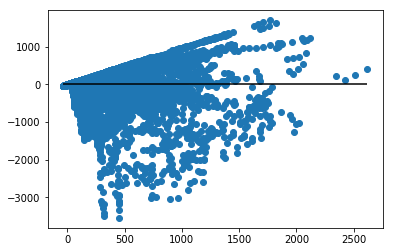

In [18]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()